------------------------

Downloading datasets

-------------------------

In [4]:
!pip install wget
!mkdir -p data
!wget -O data/jet_images.h5 "https://zenodo.org/record/3901869/files/jet_images.h5?download=1"

--2023-09-14 16:01:38--  https://zenodo.org/record/3901869/files/jet_images.h5?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85520350 (82M) [application/octet-stream]
Saving to: ‘data/jet_images.h5’

data/jet_images.h5   99%[==================> ]  81.55M   152KB/s    in 8m 53s  

2023-09-14 16:10:33 (157 KB/s) - Connection closed at byte 85507074. Retrying.

--2023-09-14 16:10:34--  (try: 2)  https://zenodo.org/record/3901869/files/jet_images.h5?download=1
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 85520350 (82M), 13276 (13K) remaining [application/octet-stream]
Saving to: ‘data/jet_images.h5’

data/jet_images.h5  100%[+++++++++++++++++++>]  81.56M  --.-KB/s    in 0s      

2023-09-14 16:10:36 (64.2 MB/s) - ‘data/jet_images.h5’ saved [85520350/85520

-----------------------------------------------------------------------
Loading the numpy arrays containing the 4D tensors of “jet-images” 

-----------------------------------------------------------------------

In [5]:
!pip install h5py

In [ ]:
import h5py  #h5py is HDF5 library to manage .h5 files

h5f = h5py.File("data/jet_images.h5", "r")

jet_images_dict = {}
jet_images_dict["QCD"] = h5f["QCD"][()]
jet_images_dict["TT"] = h5f["TT"][()]

h5f.close()

In [23]:
# 4D tensor (tensorflow backend)
# 1st dim is jet index
# 2nd dim is eta bin
# 3rd dim is phi bin
# 4th dim is pt value (or rgb values, etc.)
print(jet_images_dict["QCD"].shape)
print(jet_images_dict["TT"].shape)

(3305, 30, 30, 1)
(1722, 30, 30, 1)


----------------------------------------------------
Plotting the average W and QCD jet-images

----------------------------------------------------

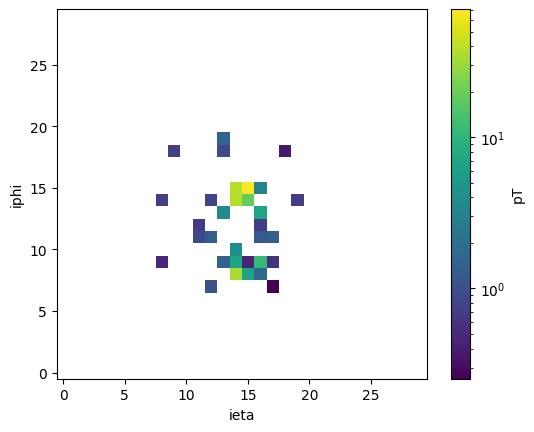

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline

# plot one W jet
i = 7
plt.figure("W")
plt.imshow(
    jet_images_dict["TT"][i, :, :, 0].T,
    norm=mpl.colors.LogNorm(),
    origin="lower",
    interpolation="none",
)
cbar = plt.colorbar()
cbar.set_label("pT")
plt.xlabel("ieta")
plt.ylabel("iphi")
plt.show()

# plot average W jet

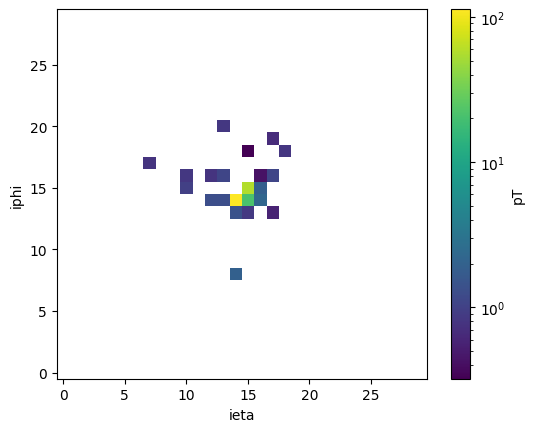

In [9]:
# plot one QCD jet
i = 7
plt.figure()
plt.imshow(
    jet_images_dict["QCD"][i, :, :, 0].T,
    norm=mpl.colors.LogNorm(),
    origin="lower",
    interpolation="none",
)
cbar = plt.colorbar()
cbar.set_label("pT")
plt.xlabel("ieta")
plt.ylabel("iphi")
plt.show()

# plot average QCD jet

In [10]:
!pip install tensorflow

------------------------------------------------------------------------------------------------------------

This is a simple 2D Convolutional NN model using regularization, batch normalization, max pooling, and a fully connected layer before the ouput which compares the performance and number of parameters when using fully connected layers instead of convolutional layers.

------------------------------------------------------------------------------------------------------------

In [15]:
!pip3 install -U scikit-learn

     |████████████████████████████████| 11.1 MB 765 kB/s eta 0:00:01
     |████████████████████████████████| 302 kB 271 kB/s eta 0:00:01


In [17]:
!pip show scikit-learn
!pip freeze

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /home/prabir/.local/lib/python3.8/site-packages
Requires: joblib, scipy, threadpoolctl, numpy
Required-by: 
absl-py==1.4.0
anyio==4.0.0
apturl==0.5.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
bcrypt==3.1.7
beautifulsoup4==4.12.2
bleach==6.0.0
blinker==1.4
Brlapi==0.7.0
cachetools==5.3.1
certifi==2019.11.28
cffi==1.15.1
chardet==3.0.4
charset-normalizer==3.2.0
Click==7.0
cmake==3.27.4.1
colorama==0.4.3
comm==0.1.4
command-not-found==0.3
contourpy==1.1.0
cryptography==2.8
cupshelpers==1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.8.0
decorator==5.1.1
defer==1.0.6
defusedxml==0.7.1
distro==1.4.0
distro-info===0.23ubuntu1
duplicity==0.8.12.0
entrypoints==0.3
exceptiongroup==1.1.3
executing=

In [12]:
!pip install sklearn
import numpy as np

In [19]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    Dense,
    BatchNormalization,
    Concatenate,
)
from tensorflow.keras.regularizers import l1, l2

nx = 30
ny = 30
inputs = Input(shape=(nx, ny, 1), name="input")
x = Conv2D(
    filters=8,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    activation="relu",
    name="conv2d_1",
    kernel_regularizer=l2(0.01),
)(inputs)
x = BatchNormalization(momentum=0.6, name="batchnorm_1")(x)
x = MaxPool2D(pool_size=(2, 2), name="maxpool2d_1")(x)
x = Flatten(name="flatten")(x)
x = Dense(64, activation="relu", name="dense")(x)
outputs = Dense(1, activation="sigmoid", name="output")(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 30, 30, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 8)         80        
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 30, 30, 8)         32        
 ation)                                                          
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 15, 15, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 64)                115264    
                                                           

---------------------------------       
Dividing the data into testing and training dataset  

-------------------------------

In [20]:
jet_images = np.concatenate([jet_images_dict["TT"], jet_images_dict["QCD"]])
jet_labels = np.concatenate(
    [np.ones(len(jet_images_dict["TT"])), np.zeros(len(jet_images_dict["QCD"]))]
)

X = jet_images
Y = jet_labels

from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print("number of W jets for training/validation: %i" % np.sum(Y_train_val == 1))
print("number of QCD jets for training/validation: %i" % np.sum(Y_train_val == 0))

print("number of W jets for testing: %i" % np.sum(Y_test == 1))
print("number of QCD jets for testing: %i" % np.sum(Y_test == 0))

# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into conv2d_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "conv2d_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

number of W jets for training/validation: 1384
number of QCD jets for training/validation: 2637
number of W jets for testing: 338
number of QCD jets for testing: 668


--------------------------------------------------        
Run training   

--------------------------------------------------------------------

In [24]:
# Train classifier
history = model.fit(
    X_train_val,
    Y_train_val,
    epochs=100,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/100
3/3 [==============================] - 1s 180ms/step - loss: 0.1691 - accuracy: 0.9406 - val_loss: 0.3073 - val_accuracy: 0.8877
Epoch 2/100
3/3 [==============================] - 0s 164ms/step - loss: 0.1675 - accuracy: 0.9396 - val_loss: 0.3069 - val_accuracy: 0.8857
Epoch 3/100
3/3 [==============================] - 0s 171ms/step - loss: 0.1656 - accuracy: 0.9426 - val_loss: 0.3062 - val_accuracy: 0.8887
Epoch 4/100
3/3 [==============================] - 1s 176ms/step - loss: 0.1646 - accuracy: 0.9446 - val_loss: 0.3074 - val_accuracy: 0.8887
Epoch 5/100
3/3 [==============================] - 0s 169ms/step - loss: 0.1621 - accuracy: 0.9430 - val_loss: 0.3086 - val_accuracy: 0.8877
Epoch 6/100
3/3 [==============================] - 0s 173ms/step - loss: 0.1609 - accuracy: 0.9459 - val_loss: 0.3089 - val_accuracy: 0.8847
Epoch 7/100
3/3 [==============================] - 0s 166ms/step - loss: 0.1588 - accuracy: 0.9459 - val_loss: 0.3085 - val_accuracy: 0.8887
Epoch 8/100
3

---------------------------------------
Ploting the history of the training and the performance in a ROC curve

-----------------------------

32/32 [==============================] - 0s 3ms/step


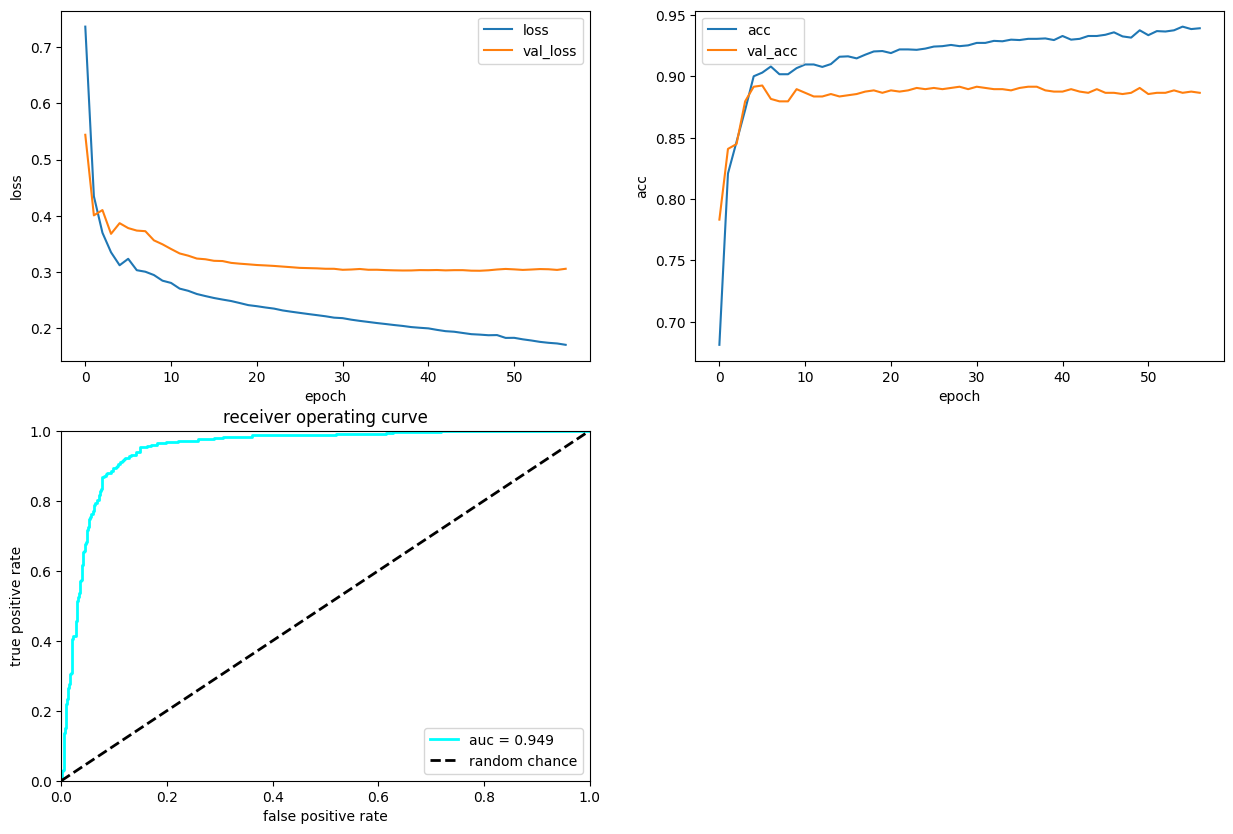

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()